In [91]:
install.packages("janitor")

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [3]:
library(reticulate)
library(bigrquery)
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(vcfR)
library(janitor)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


   *****       ***   vcfR   ***       *****
   This is vcfR 1.13.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [4]:
fapi = import('firecloud.api')

In [5]:
BILLING_PROJECT_ID = Sys.getenv('GOOGLE_PROJECT')       # terra-7a376e4e
WORKSPACE_BUCKET = Sys.getenv('WORKSPACE_BUCKET')       # gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34
WORKSPACE_NAME = Sys.getenv('WORKSPACE_NAME')           # AoU_DRC_WGS_LongReads_PacBio
WORKSPACE_NAMESPACE = Sys.getenv('WORKSPACE_NAMESPACE') # allofus-drc-wgs-lr-prod

In [6]:
load_workspace_table <- function(table_name) {
    a = fapi$get_entities(WORKSPACE_NAMESPACE, WORKSPACE_NAME, table_name)

    json = a$json()
    df = tibble(metadata = json) %>% unnest_wider(metadata) %>% unnest_wider(attributes)

    for (name in df %>% select(where(is.list)) %>% names()) {
        q = as.vector(unlist(df[,name])) %in% c("true", "TRUE", "false", "FALSE") %>% unique()
        if (q) {
            df[,name] = as.logical(as.vector(unlist(df[,name])))
        }
    }
    
    return(df)
}

In [7]:
ha_sample_t2t_df = load_workspace_table('ha-sample-t2t')

In [8]:
ha_sample_t2t_df

dvp_tbi,hifiasm_hap2,sniffles_tbi,clair_gvcf,clair_tbi,pbsv_structural_variant_stats,pbsv_vcf,pav_small_variant_stats,clair_small_variant_stats,aligned_read_length_median,⋯,ha-sm-specific-atomic-t2ts,aligned_bam,sniffles_vcf,dvp_g_vcf,pav_vcf,dvp_g_tbi,pav_structural_variant_stats,average_identity,entityType,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000513/assembly/1000513.haploTigs/1000513.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/1000513.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/pav_1000513.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/1000513.clair.stats.txt,16463,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA157919__bc1022_BAK8B_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/alignments/1000513.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/sv/1000513.sniffles.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/91fdd442-eec3-4fc2-9dc7-5c3126b5f86c/pav/f5883716-f9d2-4c57-bf85-332e30262852/call-write_vcf/pav_1000513.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.deepvariant_pepper.g.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000513/pav_1000513.stats.txt,98.9,ha-sample-t2t,1000513
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.deepvariant_pepper.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1000920/assembly/1000920.haploTigs/1000920.bp.hap2.p_ctg.fa.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.g.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/small/1000920.clair.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1000920/1000920.pbsv.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.pbsv.vcf.gz,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/pav_1000920.stats.txt,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000920/1000920.clair.stats.txt,18287,⋯,"EntityReference , ha-sm-specific-atomic-t2t, DA133698__bc1008_BAK8A_OA",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/alignments/1000920.bam,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000920/variants/sv/1000920.sniffles.vcf.gz,gs://fc

In [9]:
system(paste("gsutil cp ", ha_sample_t2t_df$dvp_small_variant_stats[1], " .", sep=""), intern=TRUE)
system(paste("grep 'QUAL\t' ", basename(ha_sample_t2t_df$dvp_small_variant_stats[1]), " | sed 's/ /_/g' > test.txt"), intern=TRUE)

dvp_df = read_table("test.txt")
names(dvp_df) = c("QUAL", "id", "quality", "num_snps", "num_ti", "num_tv", "num_indels")
dvp_df = dvp_df %>% mutate(ti_tv = num_ti/num_tv)
dvp_df

character(0)

character(0)


── Column specification ────────────────────────────────────────────────────────
cols(
  `#_QUAL` = col_character(),
  `[2]id` = col_double(),
  `[3]Quality` = col_double(),
  `[4]number_of_SNPs` = col_double(),
  `[5]number_of_transitions_(1st_ALT)` = col_double(),
  `[6]number_of_transversions_(1st_ALT)` = col_double(),
  `[7]number_of_indels` = col_double()
)



QUAL,id,quality,num_snps,num_ti,num_tv,num_indels,ti_tv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
QUAL,0,0.0,518678,216544,302134,1393074,0.7167151
QUAL,0,0.1,77313,34249,43064,58449,0.7953047
QUAL,0,0.2,36297,16469,19828,27241,0.8305931
QUAL,0,0.3,24546,11182,13364,18274,0.8367255
QUAL,0,0.4,18765,8691,10074,14007,0.8627159
QUAL,0,0.5,14969,6921,8048,11127,0.8599652
QUAL,0,0.6,12665,5736,6929,9663,0.8278251
QUAL,0,0.7,11179,5082,6097,8458,0.8335247
QUAL,0,0.8,9981,4571,5410,7348,0.8449168


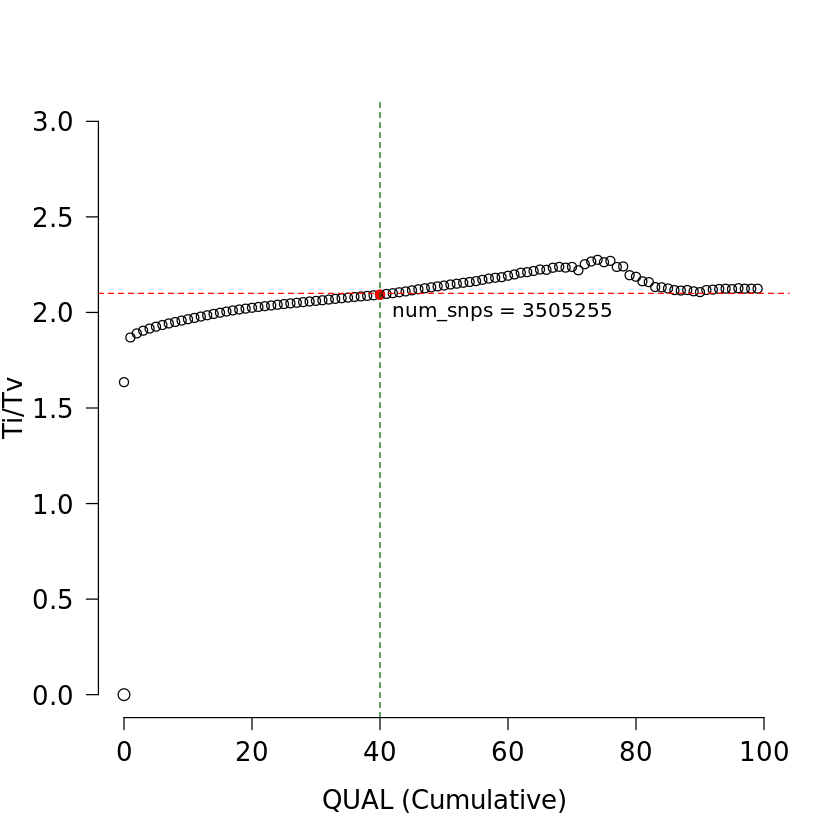

In [10]:
plot(0, 0, xlim=c(0, 100), ylim=c(0, 3), xlab="QUAL (Cumulative)", ylab="Ti/Tv", las=1, cex=1.3, cex.axis=1.3, cex.lab=1.3, bty="n")

for (i in seq(0, 100, by=1)) {
    dvp_sub_df = dvp_df %>% filter(quality >= i) %>% adorn_totals("row") %>% mutate(ti_tv = num_ti/num_tv) %>% tail(n=1)
    points(i, dvp_sub_df$ti_tv)
    
    if (i == 40) {
        points(40, dvp_sub_df$ti_tv, col="red", pch=19)
        text(40, 2.0, paste("num_snps =", dvp_sub_df$num_snps), pos=4)
    }
}

abline(h=2.1, col="red", lty=2)
abline(v=40, col="darkgreen", lty=2)

In [11]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(dvp_small_variant_stats)) %>% pull(dvp_small_variant_stats))) {
    if (!file.exists(basename(file))) {
        print(file)
        system(paste("gsutil cp ", file, " .", sep=""), intern=TRUE)
        system(paste("grep 'QUAL\t' ", basename(file), " | sed 's/ /_/g' > ", basename(file), ".qual.txt", sep=""), intern=TRUE)
    }
}

In [12]:
system("ls | grep 'qual.txt'", intern=TRUE)

[1] "1000513.clair.stats.txt.qual.txt"                    
   [2] "1000920.clair.stats.txt.qual.txt"                    
   [3] "1000920.deepvariant_pepper.phased.stats.txt.qual.txt"
   [4] "1002322.clair.stats.txt.qual.txt"                    
   [5] "1002322.deepvariant_pepper.phased.stats.txt.qual.txt"
   [6] "1002826.clair.stats.txt.qual.txt"                    
   [7] "1002826.deepvariant_pepper.phased.stats.txt.qual.txt"
   [8] "1004266.clair.stats.txt.qual.txt"                    
   [9] "1004266.deepvariant_pepper.phased.stats.txt.qual.txt"
  [10] "1005038.clair.stats.txt.qual.txt"                    
  [11] "1005038.deepvariant_pepper.phased.stats.txt.qual.txt"
  [12] "1005444.clair.stats.txt.qual.txt"                    
  [13] "1005444.deepvariant_pepper.phased.stats.txt.qual.txt"
  [14] "1007198.clair.stats.txt.qual.txt"                    
  [15] "1007198.deepvariant_pepper.phased.stats.txt.qual.txt"
  [16] "1008775.clair.stats.txt.qual.txt"                    
  [17] "1008775.deepvariant_pepper.phased.stats.txt.qual.txt"
  [18] "1010384.clair.stats.txt.qual.txt"                    
  [19] "1010384.deepvariant_pepper.phased.stats.txt.qual.txt"
  [20] "1012736.clair.stats.txt.qual.txt"                    
  [21] "1012736.deepvariant_pepper.phased.stats.txt.qual.txt"
  [22] "1013536.clair.stats.txt.qual.txt"                    
  [23] "1013536.deepvariant_pepper.phased.stats.txt.qual.txt"
  [24] "1014457.clair.stats.txt.qual.txt"                    
  [25] "1014457.deepvariant_pepper.phased.stats.txt.qual.txt"
  [26] "1014625.clair.stats.txt.qual.txt"                    
  [27] "1014625.deepvariant_pepper.phased.stats.txt.qual.txt"
  [28] "1014694.clair.stats.txt.qual.txt"                    
  [29] "1014694.deepvariant_pepper.phased.stats.txt.qual.txt"
  [30] "1014764.clair.stats.txt.qual.txt"                    
  [31] "1014764.deepvariant_pepper.phased.stats.txt.qual.txt"
  [32] "1015507.clair.stats.txt.qual.txt"                    
  [33] "1015507.deepvariant_pepper.phased.stats.txt.qual.txt"
  [34] "1025342.clair.stats.txt.qual.txt"                    
  [35] "1025342.deepvariant_pepper.phased.stats.txt.qual.txt"
  [36] "1025566.clair.stats.txt.qual.txt"                    
  [37] "1025566.deepvariant_pepper.phased.stats.txt.qual.txt"
  [38] "1025694.clair.stats.txt.qual.txt"                    
  [39] "1025694.deepvariant_pepper.phased.stats.txt.qual.txt"
  [40] "1026351.clair.stats.txt.qual.txt"                    
  [41] "1026351.deepvariant_pepper.phased.stats.txt.qual.txt"
  [42] "1026529.clair.stats.txt.qual.txt"                    
  [43] "1026529.deepvariant_pepper.phased.stats.txt.qual.txt"
  [44] "1026600.clair.stats.txt.qual.txt"                    
  [45] "1026600.deepvariant_pepper.phased.stats.txt.qual.txt"
  [46] "1026622.clair.stats.txt.qual.txt"                    
  [47] "1026622.deepvariant_pepper.phased.stats.txt.qual.txt"
  [48] "1027488.clair.stats.txt.qual.txt"                    
  [49] "1027488.deepvariant_pepper.phased.stats.txt.qual.txt"
  [50] "1029520.clair.stats.txt.qual.txt"                    
  [51] "1029520.deepvariant_pepper.phased.stats.txt.qual.txt"
  [52] "1032052.clair.stats.txt.qual.txt"                    
  [53] "1032052.deepvariant_pepper.phased.stats.txt.qual.txt"
  [54] "1036042.clair.stats.txt.qual.txt"                    
  [55] "1036042.deepvariant_pepper.phased.stats.txt.qual.txt"
  [56] "1037292.clair.stats.txt.qual.txt"                    
  [57] "1037292.deepvariant_pepper.phased.stats.txt.qual.txt"
  [58] "1039943.clair.stats.txt.qual.txt"                    
  [59] "1039943.deepvariant_pepper.phased.stats.txt.qual.txt"
  [60] "1041753.clair.stats.txt.qual.txt"                    
  [61] "1041753.deepvariant_pepper.phased.stats.txt.qual.txt"
  [62] "1044452.clair.stats.txt.qual.txt"                    
  [63] "1044452.deepvariant_pepper.phased.stats.txt.qual.txt"
  [64] "1044533.clair.stats.txt.qual.txt"                    
  [65] "1044533.deepvariant_pepper.

In [13]:
dvp_qual40_df = NULL
for (file in (ha_sample_t2t_df %>% filter(!is.na(dvp_small_variant_stats)) %>% pull(dvp_small_variant_stats))) {
    qual_file = paste(basename(file), ".qual.txt", sep="")
    if (file.exists(basename(qual_file))) {
        dvp_df = read_table(qual_file, show_col_types=FALSE)
        names(dvp_df) = c("QUAL", "id", "quality", "num_snps", "num_ti", "num_tv", "num_indels")
        
        row_df = dvp_df %>% filter(quality >= 40) %>% adorn_totals("row") %>% mutate(ti_tv = num_ti/num_tv) %>% tail(n=1)
        if (is.null(row_df)) {
            dvp_qual40_df = row_df
        } else {
            dvp_qual40_df = rbind(dvp_qual40_df, row_df)
        }
    }
}

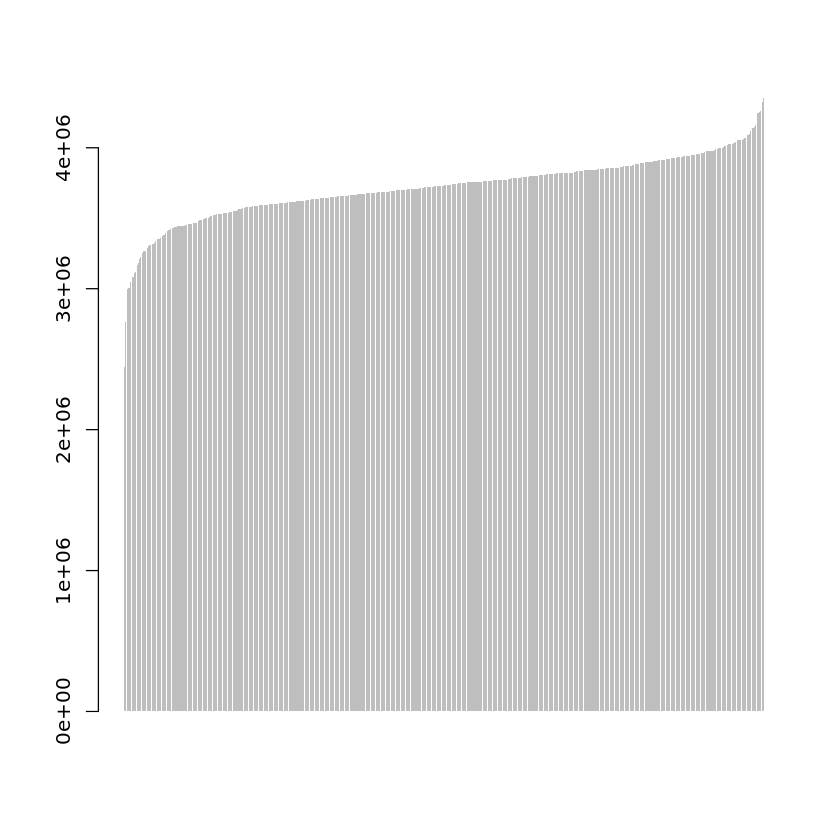

In [14]:
barplot(sort(dvp_qual40_df$num_snps), border=NA)

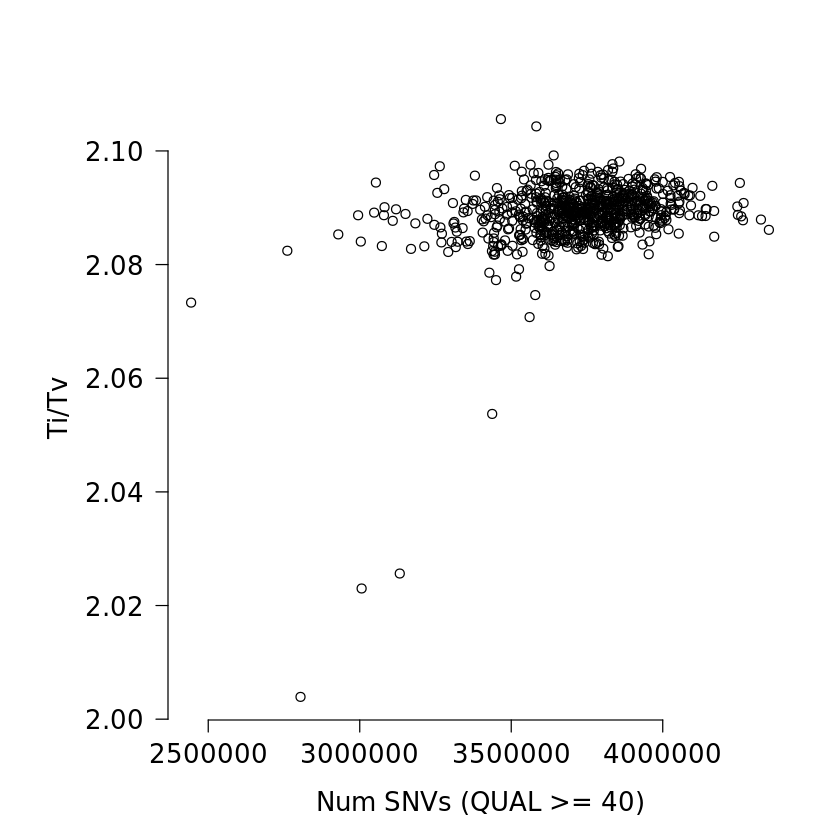

In [15]:
par(mar=c(5, 7, 4, 2))
plot(dvp_qual40_df$num_snps, dvp_qual40_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs (QUAL >= 40)", ylab="", bty="n")
mtext("Ti/Tv", 2, line=4, cex=1.3)


In [16]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(pav_small_variant_stats)) %>% pull(pav_small_variant_stats))) {
    if (!file.exists(basename(file))) {
        system(paste("gsutil cp ", file, " .", sep=""), intern=TRUE)
        system(paste("grep 'QUAL\t' ", basename(file), " | sed 's/ /_/g' > ", basename(file), ".qual.txt", sep=""), intern=TRUE)
    }
}

In [17]:
system("cat pav_1000513.stats.txt.qual.txt", intern=TRUE)

[1] "#_QUAL\t[2]id\t[3]Quality\t[4]number_of_SNPs\t[5]number_of_transitions_(1st_ALT)\t[6]number_of_transversions_(1st_ALT)\t[7]number_of_indels"
[2] "QUAL\t0\t.\t2700649\t1693787\t1006862\t1993327"

In [18]:
paste(basename((ha_sample_t2t_df %>% filter(!is.na(pav_small_variant_stats)) %>% pull(pav_small_variant_stats))[1]), ".qual.txt", sep="")

pav_df


[1] "pav_1000513.stats.txt.qual.txt"

ERROR: Error in eval(expr, envir, enclos): object 'pav_df' not found


In [19]:
pav_all_df = NULL
for (file in (ha_sample_t2t_df %>% filter(!is.na(pav_small_variant_stats)) %>% pull(pav_small_variant_stats))) {
    qual_file = paste(basename(file), ".qual.txt", sep="")
    if (file.exists(basename(qual_file))) {
        row_df = read_table(qual_file, show_col_types=FALSE)
        names(row_df) = c("QUAL", "id", "quality", "num_snps", "num_ti", "num_tv", "num_indels")
        row_df = row_df %>% mutate(ti_tv = num_ti/num_tv)
        if (is.null(row_df)) {
            pav_all_df = row_df
        } else {
            pav_all_df = rbind(pav_all_df, row_df)
        }
    }
}

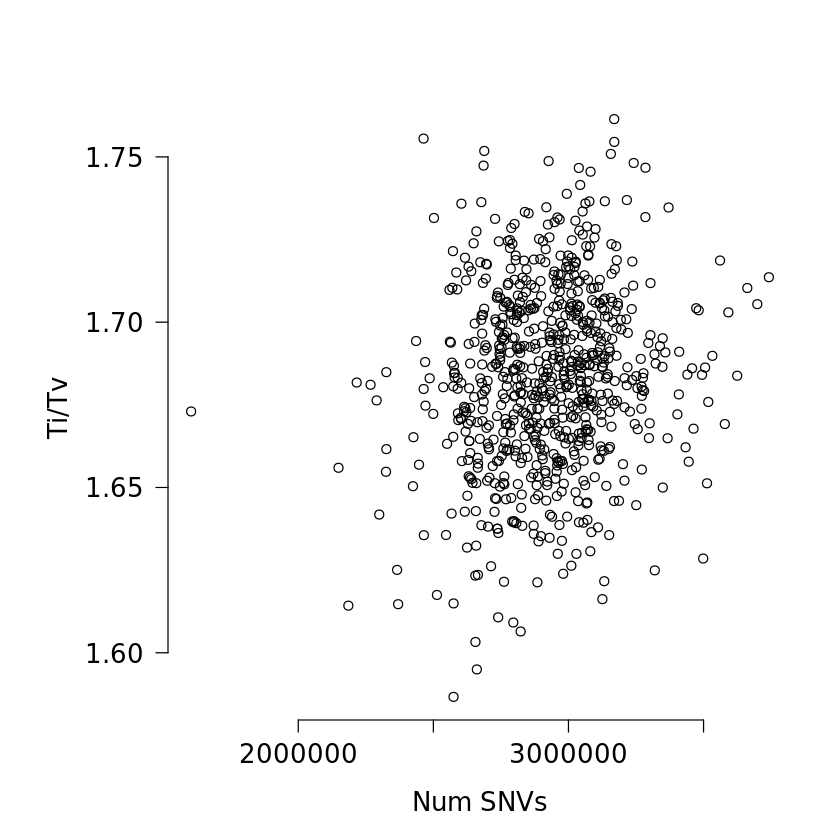

In [20]:
par(mar=c(5, 7, 4, 2))
plot(pav_all_df$num_snps, pav_all_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs", ylab="", bty="n")
mtext("Ti/Tv", 2, line=4, cex=1.3)

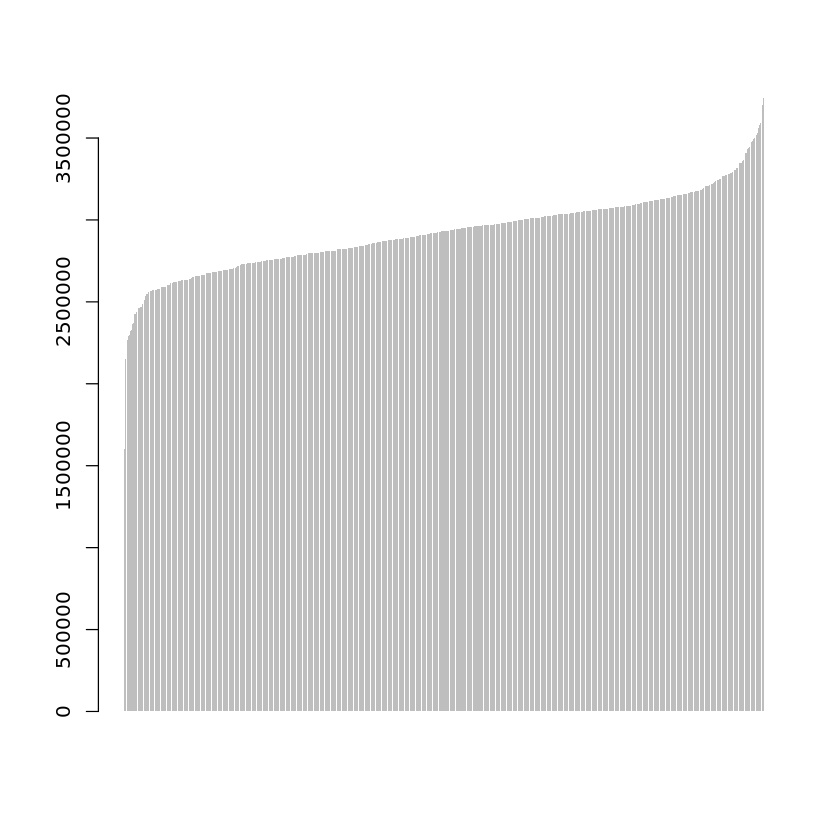

In [22]:
barplot(sort(pav_all_df$num_snps), border=NA)

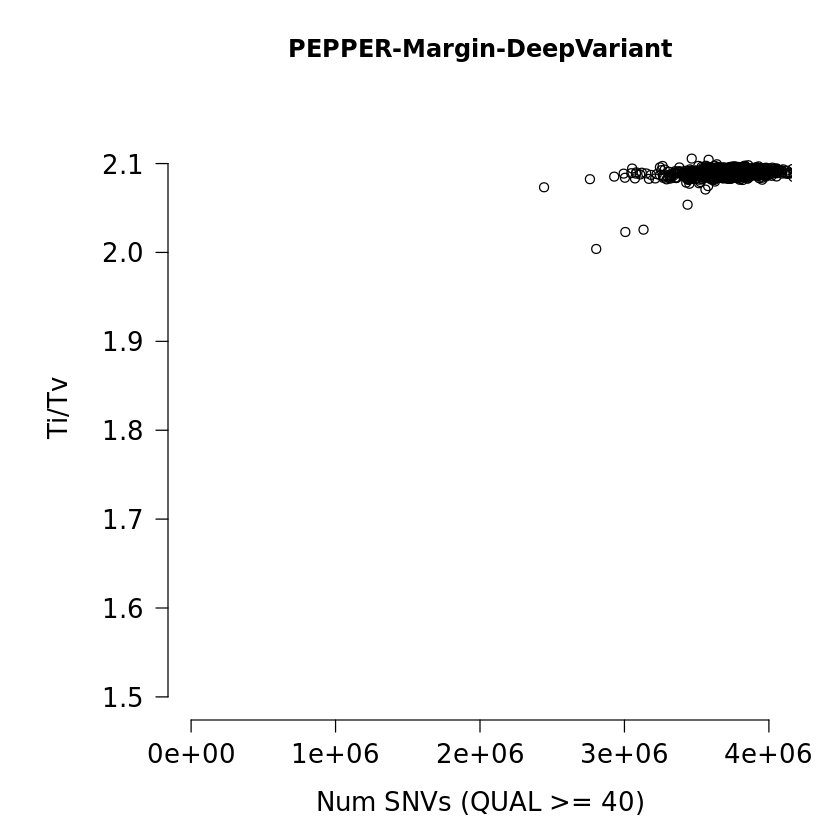

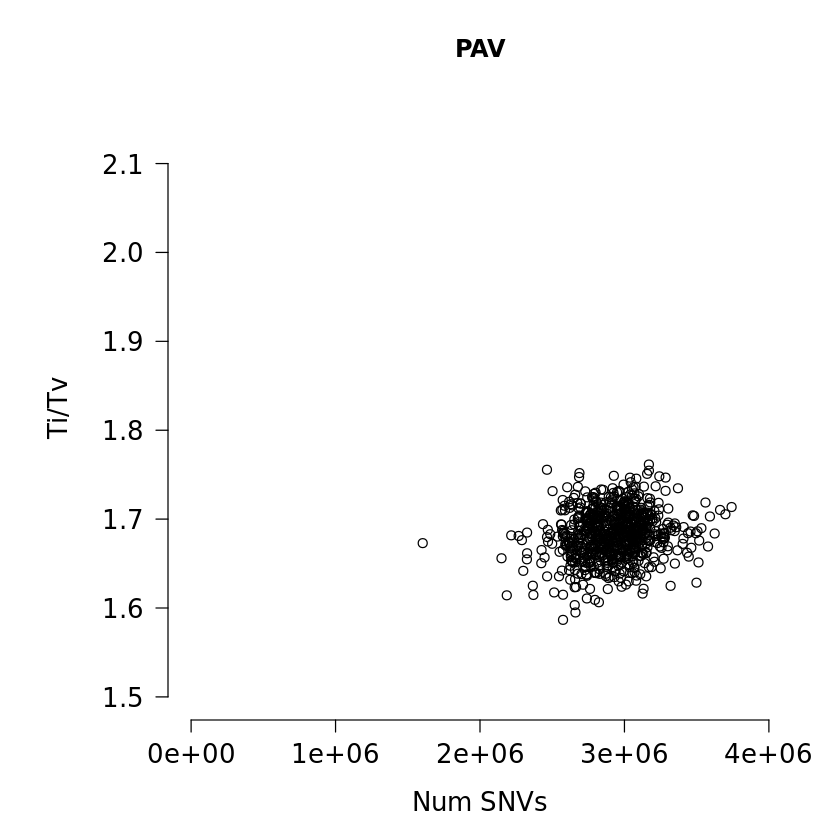

In [172]:
par(mar=c(5, 7, 4, 2))
plot(dvp_qual40_df$num_snps, dvp_qual40_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs (QUAL >= 40)", ylab="", bty="n", xlim=c(0, 4e6), ylim=c(1.5, 2.15), main="PEPPER-Margin-DeepVariant")
mtext("Ti/Tv", 2, line=4, cex=1.3)

par(mar=c(5, 7, 4, 2))
plot(pav_all_df$num_snps, pav_all_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs", ylab="", bty="n", xlim=c(0, 4e6), ylim=c(1.5, 2.15), main="PAV")
mtext("Ti/Tv", 2, line=4, cex=1.3)

In [25]:
for (file in (ha_sample_t2t_df %>% filter(!is.na(clair_small_variant_stats)) %>% pull(clair_small_variant_stats))) {
    if (!file.exists(basename(file))) {
        print(file)
        system(paste("gsutil cp ", file, " .", sep=""), intern=TRUE)
        system(paste("grep 'QUAL\t' ", basename(file), " | sed 's/ /_/g' > ", basename(file), ".qual.txt", sep=""), intern=TRUE)
    }
}

In [26]:
system("gsutil cat gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeSmallVariants/1000513/1000513.clair.stats.txt", intern=TRUE)


[1] "# This file was produced by bcftools stats (1.13+htslib-1.13) and can be plotted using plot-vcfstats."                                                                                           
  [2] "# The command line was:\tbcftools stats  /cromwell_root/fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.vcf.gz"                 
  [3] "#"                                                                                                                                                                                               
  [4] "# Definition of sets:"                                                                                                                                                                           
  [5] "# ID\t[2]id\t[3]tab-separated file names"                                                                                                                                                        
  [6] "ID\t0\t/cromwell_root/fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1000513/variants/small/1000513.clair.vcf.gz"                                                   
  [7] "# SN, Summary numbers:"                                                                                                                                                                          
  [8] "#   number of records   .. number of data rows in the VCF"                                                                                                                                       
  [9] "#   number of no-ALTs   .. reference-only sites, ALT is either \".\" or identical to REF"                                                                                                        
 [10] "#   number of SNPs      .. number of rows with a SNP"                                                                                                                                            
 [11] "#   number of MNPs      .. number of rows with a MNP, such as CC>TT"                                                                                                                             
 [12] "#   number of indels    .. number of rows with an indel"                                                                                                                                         
 [13] "#   number of others    .. number of rows with other type, for example a symbolic allele or"                                                                                                     
 [14] "#                          a complex substitution, such as ACT>TCGA"                                                                                                                             
 [15] "#   number of multiallelic sites     .. number of rows with multiple alternate alleles"                                                                                                          
 [16] "#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs"                                                                                                
 [17] "# "                                                                                                                                                                                              
 [18] "#   Note that rows containing multiple types will be counted multiple times, in each"                                                                                                            
 [19] "#   counter. For example, a row with a SNP and an indel increments both the SNP and"                                                                                                             
 [20] "#   the indel counter."                                                                                                                                                         

In [27]:
clair_df = read_table("1000513.clair.stats.txt.qual.txt")
names(clair_df) = c("QUAL", "id", "quality", "num_snps", "num_ti", "num_tv", "num_indels")
clair_df = clair_df %>% mutate(ti_tv = num_ti/num_tv)
clair_df


── Column specification ────────────────────────────────────────────────────────
cols(
  `#_QUAL` = col_character(),
  `[2]id` = col_double(),
  `[3]Quality` = col_double(),
  `[4]number_of_SNPs` = col_double(),
  `[5]number_of_transitions_(1st_ALT)` = col_double(),
  `[6]number_of_transversions_(1st_ALT)` = col_double(),
  `[7]number_of_indels` = col_double()
)



QUAL,id,quality,num_snps,num_ti,num_tv,num_indels,ti_tv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
QUAL,0,0.0,4093,1520,2573,54422,0.5907501
QUAL,0,0.1,158,53,105,2406,0.5047619
QUAL,0,0.2,192,70,122,2482,0.5737705
QUAL,0,0.3,176,59,117,2556,0.5042735
QUAL,0,0.4,209,96,113,2697,0.8495575
QUAL,0,0.5,222,77,145,2802,0.5310345
QUAL,0,0.6,236,99,137,2902,0.7226277
QUAL,0,0.7,243,83,160,3167,0.5187500
QUAL,0,0.8,266,115,151,3110,0.7615894


In [39]:
clair_df %>% filter(quality >= 26) %>% adorn_totals("row") %>% tail(n=1)

QUAL,id,quality,num_snps,num_ti,num_tv,num_indels
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total,0,4497,404671,270292,134379,14829


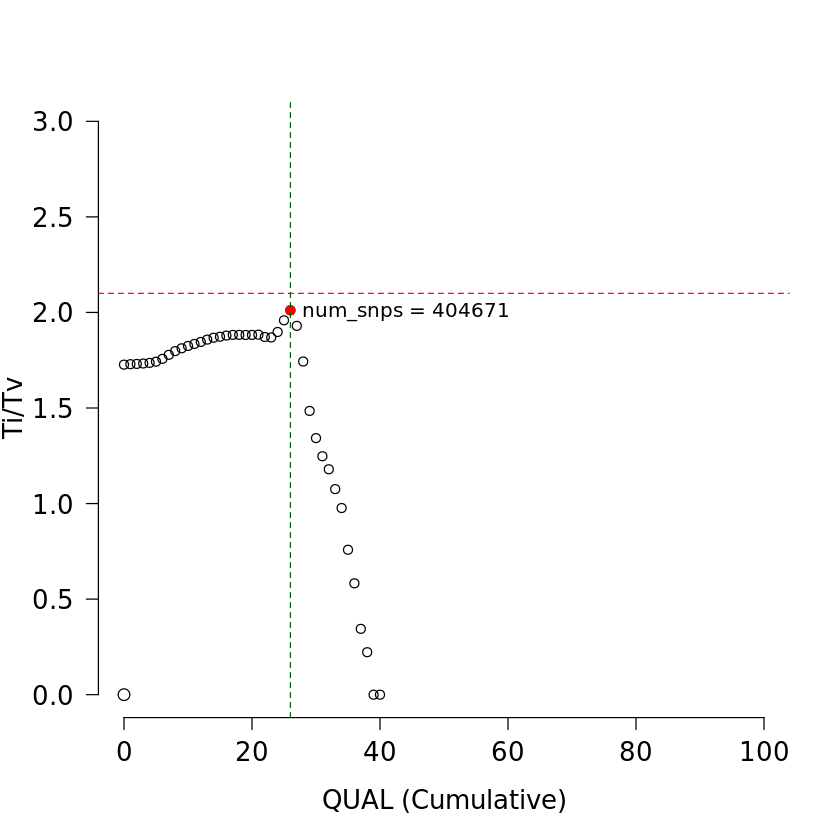

In [34]:
plot(0, 0, xlim=c(0, 100), ylim=c(0, 3), xlab="QUAL (Cumulative)", ylab="Ti/Tv", las=1, cex=1.3, cex.axis=1.3, cex.lab=1.3, bty="n")

for (i in seq(0, 100, by=1)) {
    clair_sub_df = clair_df %>% filter(quality >= i) %>% adorn_totals("row") %>% mutate(ti_tv = num_ti/num_tv) %>% tail(n=1)
    points(i, clair_sub_df$ti_tv)
    
    if (i == 26) {
        points(26, clair_sub_df$ti_tv, col="red", pch=19)
        text(26, 2.0, paste("num_snps =", clair_sub_df$num_snps), pos=4)
    }
}

abline(h=2.1, col="red", lty=2)
abline(v=26, col="darkgreen", lty=2)

In [29]:
clair_qual26_df = NULL
for (file in (ha_sample_t2t_df %>% filter(!is.na(clair_small_variant_stats)) %>% pull(clair_small_variant_stats))) {
    qual_file = paste(basename(file), ".qual.txt", sep="")
    if (file.exists(basename(qual_file))) {
        clair_df = read_table(qual_file, show_col_types=FALSE)
        names(clair_df) = c("QUAL", "id", "quality", "num_snps", "num_ti", "num_tv", "num_indels")
        
        row_df = clair_df %>% filter(quality >= 26) %>% adorn_totals("row") %>% mutate(ti_tv = num_ti/num_tv) %>% tail(n=1)
        if (is.null(row_df)) {
            clair_qual26_df = row_df
        } else {
            clair_qual26_df = rbind(clair_qual26_df, row_df)
        }
    }
}

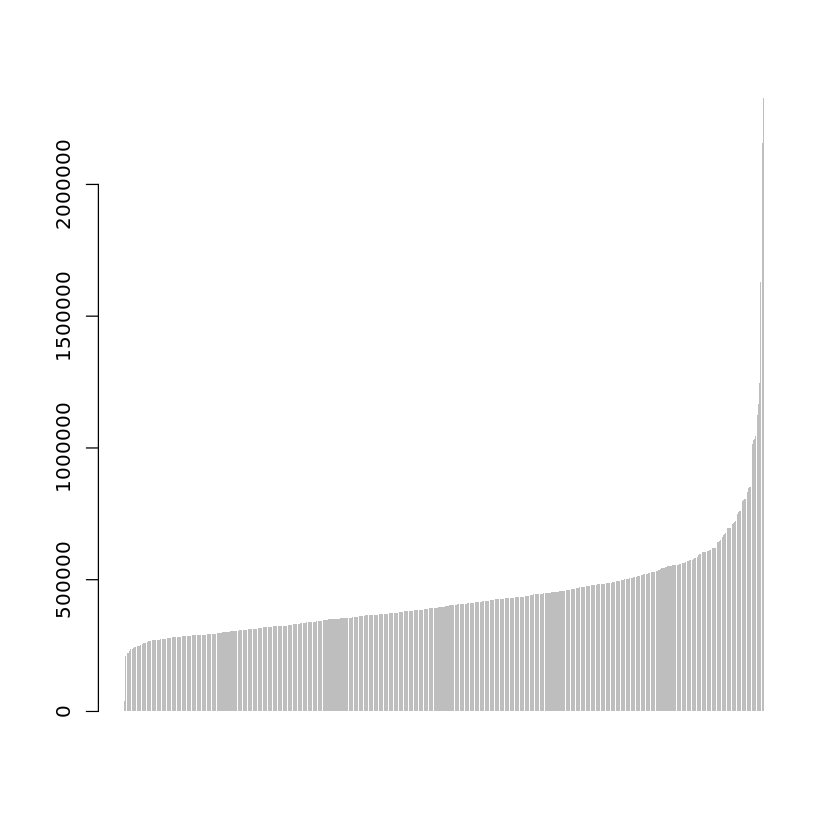

In [30]:
barplot(sort(clair_qual26_df$num_snps), border=NA)

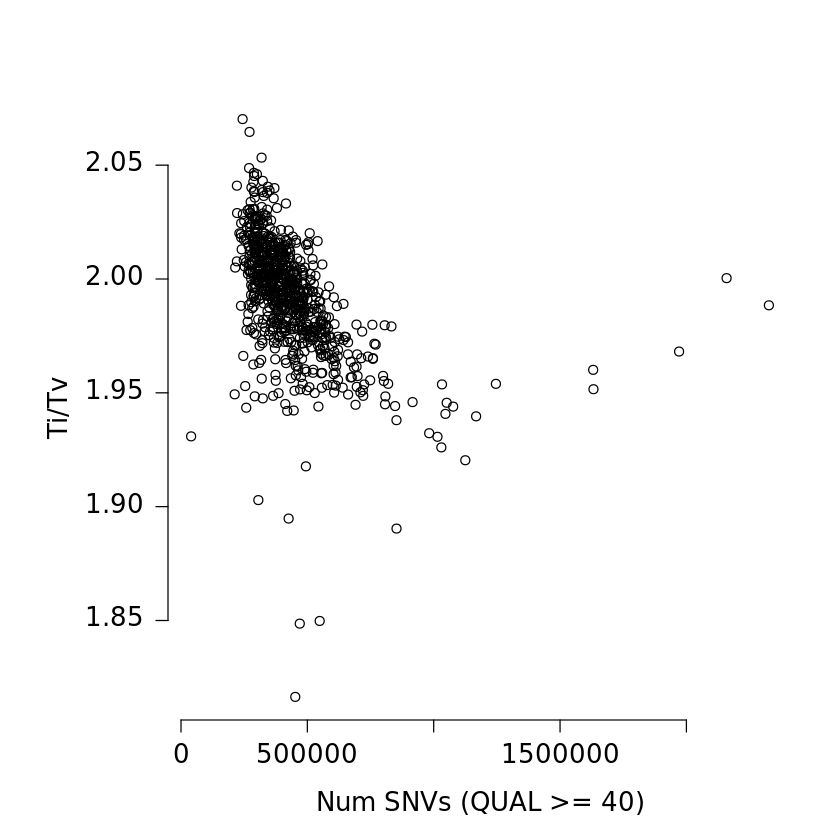

In [31]:
par(mar=c(5, 7, 4, 2))
plot(clair_qual26_df$num_snps, clair_qual26_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs (QUAL >= 40)", ylab="", bty="n")
mtext("Ti/Tv", 2, line=4, cex=1.3)

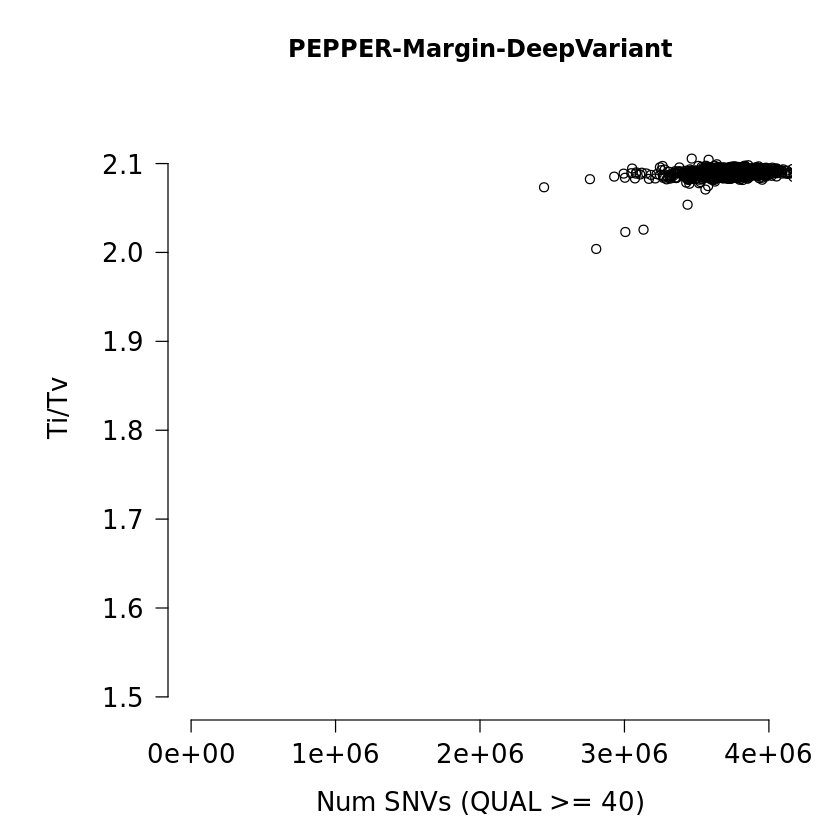

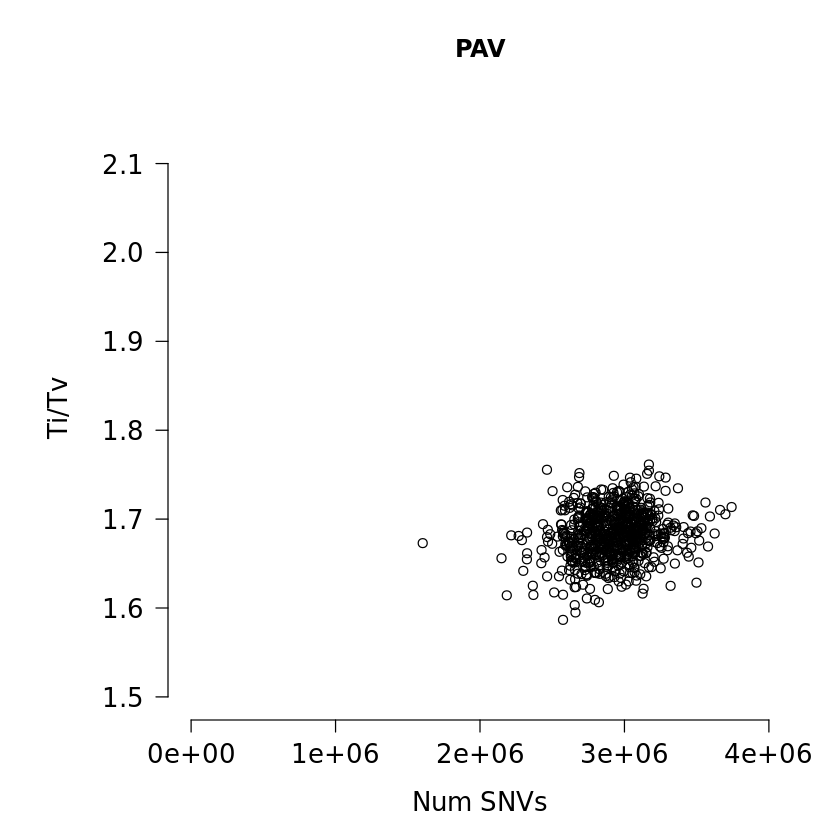

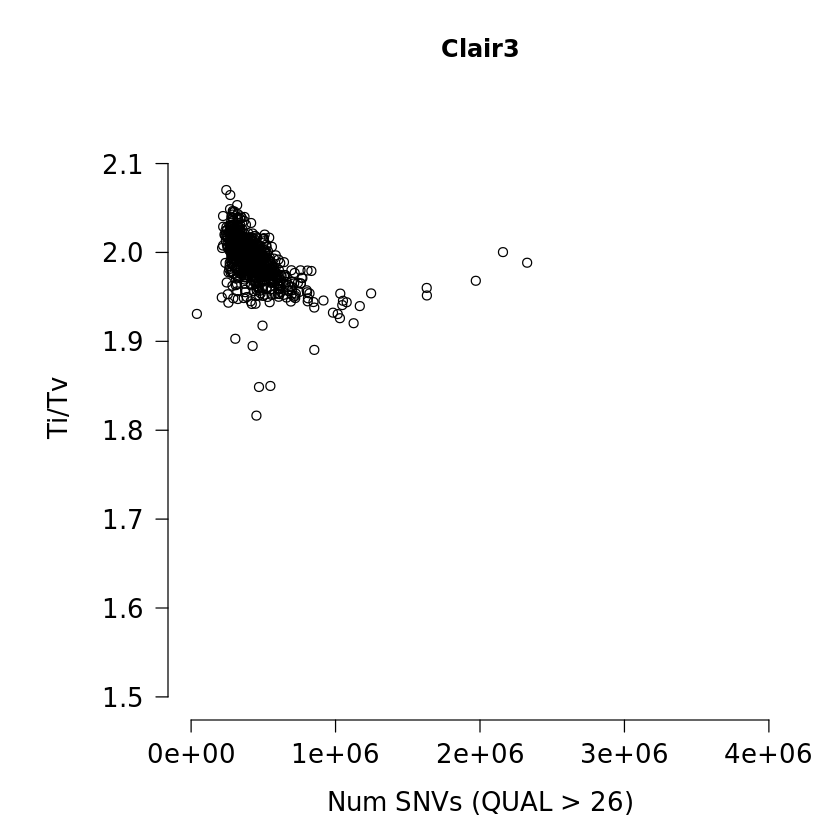

In [32]:
par(mar=c(5, 7, 4, 2))
plot(dvp_qual40_df$num_snps, dvp_qual40_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs (QUAL >= 40)", ylab="", bty="n", xlim=c(0, 4e6), ylim=c(1.5, 2.15), main="PEPPER-Margin-DeepVariant")
mtext("Ti/Tv", 2, line=4, cex=1.3)

par(mar=c(5, 7, 4, 2))
plot(pav_all_df$num_snps, pav_all_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs", ylab="", bty="n", xlim=c(0, 4e6), ylim=c(1.5, 2.15), main="PAV")
mtext("Ti/Tv", 2, line=4, cex=1.3)

par(mar=c(5, 7, 4, 2))
plot(clair_qual26_df$num_snps, clair_qual26_df$ti_tv, las=1, cex.lab=1.3, cex.axis=1.3, xlab="Num SNVs (QUAL > 26)", ylab="", bty="n", xlim=c(0, 4e6), ylim=c(1.5, 2.15), main="Clair3")
mtext("Ti/Tv", 2, line=4, cex=1.3)